## Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución

In [51]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [52]:
# Importar dataset

# Usar sólo las columnas necesarias
columns = ['Location','MinTemp', 'MaxTemp']
df = pd.read_csv("weatherAUS.csv", usecols= columns)

# df = df.groupby(['Date'])[['MinTemp','MaxTemp']]

# Sólo usar la ciudad de Canberra para establecer el modelo
df = df[df['Location'] == 'Canberra']
df

,Location,MinTemp,MaxTemp
45587,Canberra,8.0,24.3
45588,Canberra,14.0,26.9
45589,Canberra,13.7,23.4
45590,Canberra,13.3,15.5
45591,Canberra,7.6,16.1
...,...,...,...
49018,Canberra,-2.4,14.7
49019,Canberra,-0.4,13.9
49020,Canberra,-2.9,13.3
49021,Canberra,0.1,14.4


In [53]:
# Limpieza de datos - eliminar los datos vacíos
df = df.dropna()
df

,Location,MinTemp,MaxTemp
45587,Canberra,8.0,24.3
45588,Canberra,14.0,26.9
45589,Canberra,13.7,23.4
45590,Canberra,13.3,15.5
45591,Canberra,7.6,16.1
...,...,...,...
49018,Canberra,-2.4,14.7
49019,Canberra,-0.4,13.9
49020,Canberra,-2.9,13.3
49021,Canberra,0.1,14.4


In [54]:
x = np.array(df['MinTemp']).reshape((-1,1))
y = df['MaxTemp']

In [55]:
model = LinearRegression(fit_intercept=True).fit(x,y)
model

LinearRegression()

In [56]:
predicts = model.predict(x)

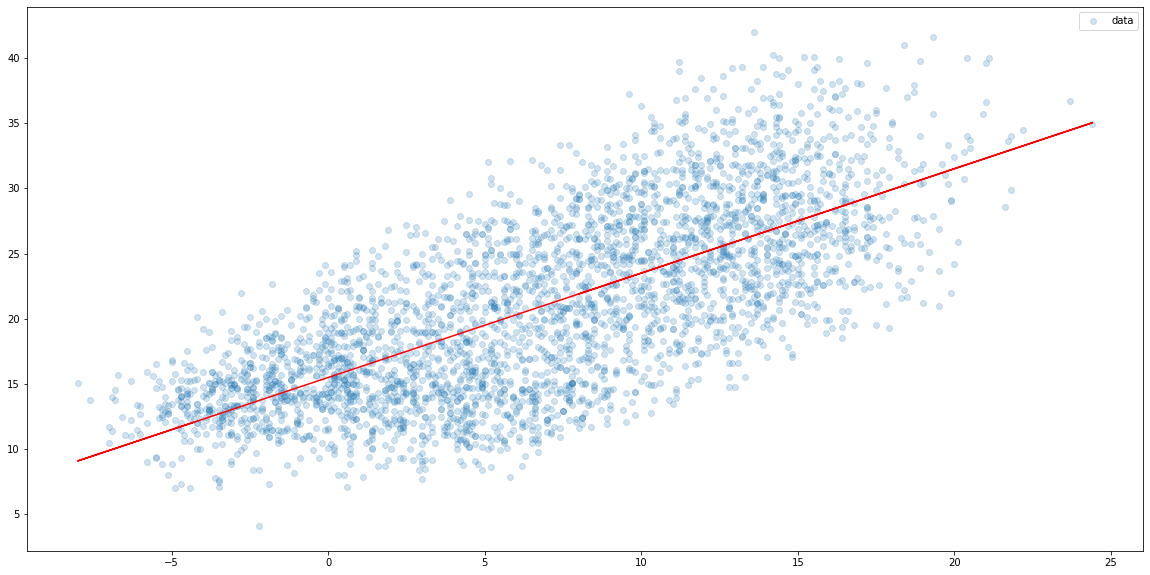

In [57]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y, 'o',alpha=0.2, label="data")
ax.plot(x, predicts, 'r-')
ax.legend(loc='best')
plt.show() 

In [65]:
predicts

array([21.90356251, 26.70672369, 26.46656563, ..., 13.17781969,
       15.57940028, 12.05708208])

### Polimonial

In [58]:
poly = PolynomialFeatures(degree=5,include_bias=False)
poly

PolynomialFeatures(degree=5, include_bias=False)

In [59]:
poly_features = poly.fit_transform(x)

In [60]:
model.fit(poly_features, y)

LinearRegression()

In [61]:
y_predicted = model.predict(poly_features)
y_predicted

array([21.57735696, 27.43293629, 27.22273885, ..., 14.56980201,
       15.38125962, 13.91983247])

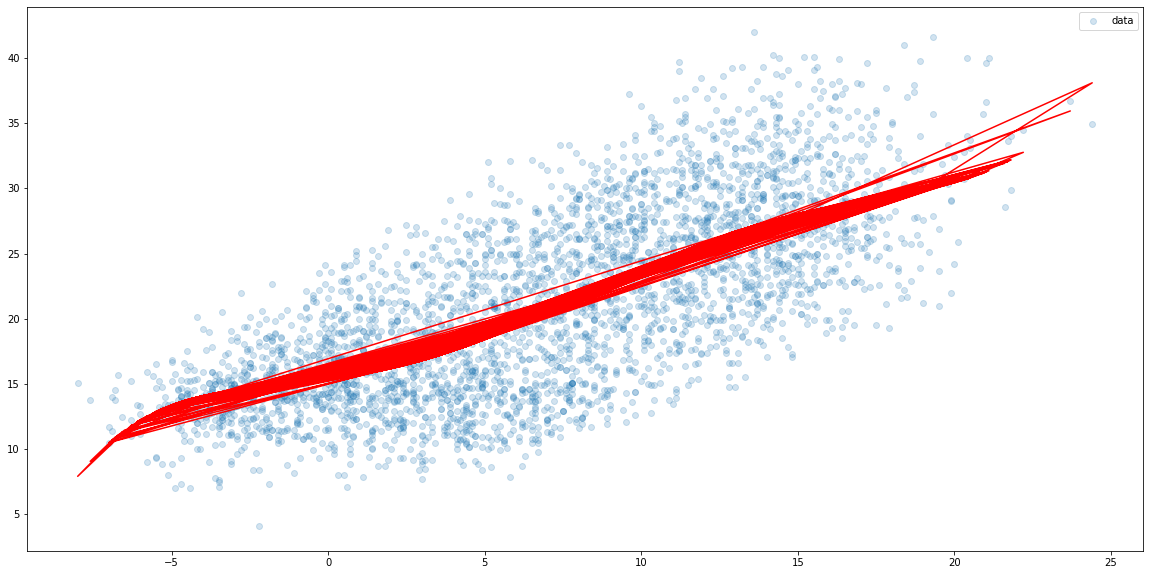

In [63]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y, 'o', alpha=0.2, label="data")
ax.plot(x, y_predicted, 'r-')
ax.legend(loc='best')
plt.show() 

In [64]:
y_predicted

array([21.57735696, 27.43293629, 27.22273885, ..., 14.56980201,
       15.38125962, 13.91983247])